 # CSE512-Assignment
 
# Anonna Bokshi    

Department of Electrical & Computer Engineering, North South University <br>
ID: 2115111650

# Module installation

In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing libraries

In [4]:
import psycopg2
import pandas as pd
import psycopg2.extras

# Loading data

In [6]:
def load_fact_table_data():
    
    fact_table=pd.read_excel(r'D:\HDA-Tech-Learning\e-commerece_data.xlsx', sheet_name='Fact_table', engine='openpyxl')
    
    return fact_table


def load_transaction_dim_data():
    
    transaction_dim=pd.read_excel(r'D:\HDA-Tech-Learning\e-commerece_data.xlsx', sheet_name='Trans_dim', engine='openpyxl')
    
    return transaction_dim


def load_item_dim_data():
    
    item_dim=pd.read_excel(r'D:\HDA-Tech-Learning\e-commerece_data.xlsx', sheet_name='Item_dim', engine='openpyxl')
    
    return item_dim

def load_customer_dim_data():
    
    customer_dim=pd.read_excel(r'D:\HDA-Tech-Learning\e-commerece_data.xlsx', sheet_name='Coustomer_dim', engine='openpyxl')
    
    return customer_dim

def load_time_dim_data():
    
    time_dim=pd.read_excel(r'D:\HDA-Tech-Learning\e-commerece_data.xlsx', sheet_name='Time_dim', engine='openpyxl')
    
    return time_dim

def load_store_dim_data():
    
    store_dim=pd.read_excel(r'D:\HDA-Tech-Learning\e-commerece_data.xlsx', sheet_name='Store_dim', engine='openpyxl')
    
    return store_dim

In [7]:
fact_table= load_fact_table_data()
transaction_dim= load_transaction_dim_data()
item_dim= load_item_dim_data()
customer_dim= load_customer_dim_data()
time_dim= load_time_dim_data()
store_dim= load_store_dim_data()

In [8]:
fact_table.head(5)

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


# Identify missing values

In [11]:
fact_table.isnull().sum()

payment_key         0
coustomer_key       0
time_key            0
item_key            0
store_key           0
quantity            0
unit             3723
unit_price          0
total_price         0
dtype: int64

In [12]:
transaction_dim.isnull().sum()

payment_key    0
trans_type     0
bank_name      1
dtype: int64

In [14]:
item_dim.isnull().sum()

item_key       0
item_name      0
desc           0
unit_price     0
man_country    0
supplier       0
unit           1
dtype: int64

In [15]:
customer_dim.isnull().sum()

coustomer_key     0
name             27
contact_no        0
nid               0
dtype: int64

In [16]:
time_dim.isnull().sum()

time_key    0
date        0
hour        0
day         0
week        0
month       0
quarter     0
year        0
dtype: int64

In [17]:
store_dim.isnull().sum()

store_key    0
division     0
district     0
upazila      0
dtype: int64

We can measure that the data frame such as fact_table, customer_dim, item_dim and transaction_dim have missing values, therefore, it has to be removed before executing the further steps

# Remove missing values 

In [21]:
fact_table=fact_table.dropna()
num_rows = len(fact_table)
print("Total number of rows: ", num_rows)
print(f"Total missing values: {fact_table.isnull().sum()}")

Total number of rows:  996277
Total missing values: payment_key      0
coustomer_key    0
time_key         0
item_key         0
store_key        0
quantity         0
unit             0
unit_price       0
total_price      0
dtype: int64


In [18]:
transaction_dim=transaction_dim.dropna()
num_rows = len(transaction_dim)
print("Total number of rows: ", num_rows)
print(f"Total missing values: {transaction_dim.isnull().sum()}")

Total number of rows:  38
Total missing values: payment_key    0
trans_type     0
bank_name      0
dtype: int64


In [19]:
item_dim=item_dim.dropna()
num_rows = len(item_dim)
print("Total number of rows: ", num_rows)
print(f"Total missing values: {item_dim.isnull().sum()}")

Total number of rows:  263
Total missing values: item_key       0
item_name      0
desc           0
unit_price     0
man_country    0
supplier       0
unit           0
dtype: int64


In [20]:
customer_dim=customer_dim.dropna()
num_rows = len(item_dim)
print("Total number of rows: ", num_rows)
print(f"Total missing values: {customer_dim.isnull().sum()}")

Total number of rows:  263
Total missing values: coustomer_key    0
name             0
contact_no       0
nid              0
dtype: int64


# Data Transformation

In [22]:
item_dim['unit_price'] = pd.to_numeric(item_dim['unit_price'])
item_dim.dtypes

item_key        object
item_name       object
desc            object
unit_price     float64
man_country     object
supplier        object
unit            object
dtype: object

In [23]:
time_dim['date'] = time_dim['date'].astype('datetime64[ns]')
time_dim.dtypes
time_dim

C:\Users\ACER\AppData\Local\Temp\ipykernel_8980\236773692.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time_dim['date'] = time_dim['date'].astype('datetime64[ns]')


,time_key,date,hour,day,week,month,quarter,year
0,T00001,2017-05-20 14:56:00,14,20,3rd Week,5,Q2,2017
1,T00002,2015-01-30 22:14:00,22,30,4th Week,1,Q1,2015
2,T00003,2020-03-14 02:34:00,2,14,2nd Week,3,Q1,2020
3,T00004,2018-04-27 12:19:00,12,27,4th Week,4,Q2,2018
4,T00005,2018-04-14 10:43:00,10,14,2nd Week,4,Q2,2018
...,...,...,...,...,...,...,...,...
99994,T099995,2015-01-04 17:22:00,17,4,1st Week,1,Q1,2015
99995,T099996,2015-01-17 21:09:00,21,17,3rd Week,1,Q1,2015
99996,T099997,2020-01-23 14:42:00,14,23,4th Week,1,Q1,2020
99997,T099998,2015-10-31 13:52:00,13,31,4th Week,10,Q4,2015


In [24]:
fact_table['unit_price'] = pd.to_numeric(fact_table['unit_price'])
fact_table['total_price'] = pd.to_numeric(fact_table['total_price'])
fact_table.dtypes

payment_key       object
coustomer_key     object
time_key          object
item_key          object
store_key         object
quantity           int64
unit              object
unit_price       float64
total_price      float64
dtype: object

# Connect to Database

In [27]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "1234",
                                           host = "localhost",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [28]:
con = PostgresConnection().getConnection()

Connection to DB established!


# Insert Data into Tables

In [29]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO ecom_schema.trans_dim(payment_key, trans_type, bank_name)" \
            " VALUES (%s, %s, %s)"
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, transaction_dim.values)
con.commit()
cur.close()

Connection to DB established!


In [30]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO ecom_schema.store_dim( store_key, division, district, upazila) VALUES (%s, %s, %s, %s);"
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, store_dim.values)
con.commit()
cur.close()

Connection to DB established!


In [31]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO ecom_schema.item_dim(item_key, item_name, \"desc\", unit_price, man_country, supplier, unit) VALUES (%s, %s, %s, %s, %s, %s, %s);"

cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, item_dim.values)
con.commit()
cur.close()

Connection to DB established!


In [37]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO ecom_schema.coustomer_dim(coustomer_key, name, contact_no, nid)VALUES (%s, %s, %s, %s);"
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, customer_dim.values)
con.commit()
cur.close()

Connection to DB established!


In [38]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO ecom_schema.time_dim(time_key, date, hour, day, week, month, quarter, year)VALUES (%s, %s, %s, %s, %s, %s, %s, %s);"
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, time_dim.values)
con.commit()
cur.close()

Connection to DB established!


In [ ]:
# def insert_fact_table(self, values):
#         insert_stmt = "INSERT INTO ecom_schema.fact_table(payment_key, coustomer_key, time_key, item_key, store_key, quantity, unit, unit_price, total_price)VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s) ON CONFLICT DO NOTHING;"
#         with tqdm(total=len(values)) as pbar:
#             psycopg2.extras.execute_batch(self.cur, insert_stmt, values, page_size=1000)
#             pbar.update(len(values))
#         print(f"{len(values)} rows inserted into fact_table")

In [72]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO ecom_schema.fact_table(payment_key, coustomer_key, time_key, item_key, store_key, quantity, unit, unit_price, total_price)VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s) ON CONFLICT DO NOTHING;"
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, fact_table.values)
con.commit()
cur.close()

Connection to DB established!


# Task Details-1

#### Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table

In [32]:
con = PostgresConnection().getConnection()
cur = con.cursor()
try:
    cur.execute("BEGIN")
    select_stmt = "SELECT s.division, SUM(CAST(t.total_price AS DECIMAL)) " \
                  "FROM ecom_schema.fact_table t " \
                  "JOIN ecom_schema.store_dim s on s.store_key=t.store_key " \
                    "JOIN ecom_schema.time_dim tim on tim.time_key=t.time_key " \
                    "WHERE tim.month=12 " \
                    "GROUP BY s.division " \
                    "ORDER BY s.division"
    cur.execute(select_stmt)
    records = cur.fetchall()
    cur.execute("COMMIT")
except:
    cur.execute("ROLLBACK")
    raise

print(records)


Connection to DB established!
[('BARISAL', Decimal('638101.00')), ('CHITTAGONG', Decimal('1665138.00')), ('DHAKA', Decimal('3440676.25')), ('KHULNA', Decimal('952049.75')), ('RAJSHAHI', Decimal('1041201.25')), ('RANGPUR', Decimal('721057.50')), ('SYLHET', Decimal('465256.75'))]


In [33]:
df = pd.DataFrame(list(records), columns=['division', 'sales'])

In [34]:
print(df)

     division       sales
0     BARISAL   638101.00
1  CHITTAGONG  1665138.00
2       DHAKA  3440676.25
3      KHULNA   952049.75
4    RAJSHAHI  1041201.25
5     RANGPUR   721057.50
6      SYLHET   465256.75


### Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [37]:
con = PostgresConnection().getConnection()
cur = con.cursor()

try:

    # begin a transaction
    cur.execute("BEGIN")

    # execute the query
    select_stmt = """
    SELECT
        bank_dim.name AS bank_name,
        customer_dim.customer_name,
        transaction_type_dim.trans_type AS transaction_type,
        SUM(CAST(fact_table.total_price AS INTEGER)) AS total_sale_price
    FROM
        fact_table
        JOIN bank_dim ON fact_table.coustomer_key = bank_dim.coustomer_key
        JOIN customer_dim ON fact_table.coustomer_key = customer_dim.customer_id
        JOIN transaction_type_dim ON fact_table.payment_key = transaction_type_dim.payment_key
    GROUP BY
        bank_dim.name,
        customer_dim.customer_name,
        transaction_type_dim.trans_type
    ORDER BY
        bank_dim.name,
        customer_dim.customer_name,
        transaction_type_dim.trans_type
    """

    cur.execute(select_stmt)

    # fetch the results
    records = cur.fetchall()

    # commit the transaction
    cur.execute("COMMIT")


except:
        
     # print the results
    for record in records:
        print(record)

    # close the cursor and connection
    cur.close()
    con.close()


Connection to DB established!
('BARISAL', Decimal('638101.00'))
('CHITTAGONG', Decimal('1665138.00'))
('DHAKA', Decimal('3440676.25'))
('KHULNA', Decimal('952049.75'))
('RAJSHAHI', Decimal('1041201.25'))
('RANGPUR', Decimal('721057.50'))
('SYLHET', Decimal('465256.75'))


### Q3: Find the total sales in Barishal

In [38]:
con = PostgresConnection().getConnection()
cur = con.cursor()

# execute the query
try:
    cur.execute("BEGIN")
    select_stmt = "SELECT s.district, SUM(CAST(t.total_price AS DECIMAL)) " \
                  "FROM ecom_schema.fact_table t " \
                  "JOIN ecom_schema.store_dim s ON s.store_key = t.store_key " \
                  "JOIN ecom_schema.time_dim tim ON tim.time_key = t.time_key " \
                  "WHERE s.district = 'Barisal' " \
                  "GROUP BY s.district"
    cur.execute(select_stmt)
    records = cur.fetchall()
    cur.execute("COMMIT")
except:
    cur.execute("ROLLBACK")
    raise

# print the results
print(f"Total sales in Barishal: {records}")

# close the cursor and connection
cur.close()
con.close()


Connection to DB established!
Total sales in Barishal: []


Observation: There is no sales in Barishal

### Q4: Total sales in 2015

In [39]:
con = PostgresConnection().getConnection()

cur = con.cursor()

# execute the query
try:
    cur.execute("BEGIN")
    select_stmt = "SELECT SUM(f.total_price) as total_sale_price " \
                  "FROM ecom_schema.fact_table f " \
                  "JOIN ecom_schema.time_dim t ON f.time_key = t.time_key " \
                  "WHERE t.year = 2015"
    cur.execute(select_stmt)
    records = cur.fetchall()
    cur.execute("COMMIT")
except:
    cur.execute("ROLLBACK")
    raise

# print the results
print(f"Total sales in 2015: {records}")

# close the cursor and connection
cur.close()
con.close()


Connection to DB established!
Total sales in 2015: [(Decimal('15095720.25'),)]


### Q5: Total sales of Barishal in 2015

In [40]:
con = PostgresConnection().getConnection()
cur = con.cursor()

# execute the query
try:
    cur.execute("BEGIN")
    select_stmt = "SELECT SUM(f.total_price) as total_sale_price " \
                  "FROM ecom_schema.fact_table f " \
                  "JOIN ecom_schema.time_dim t ON f.time_key = t.time_key " \
                  "JOIN ecom_schema.store_dim s ON f.store_key = s.store_key " \
                  "WHERE s.district = 'Barisal' AND t.year = 2015"
    cur.execute(select_stmt)
    records = cur.fetchall()
    cur.execute("COMMIT")
except:
    cur.execute("ROLLBACK")
    raise

# print the results
print(f"Total sales of Barishal in 2015: {records}")

# close the cursor and connection
cur.close()
con.close()


Connection to DB established!
Total sales of Barishal in 2015: [(None,)]


#### Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

    S1-> item1 -> quantity_sales

    S1-> item2 -> quantity_sales

    S1-> item3 -> quantity_sales

In [46]:
con = PostgresConnection().getConnection()
cur = con.cursor()

# Write the query
query = """

SELECT store_dim.store_key AS Store, 
       item_dim.item_name AS Item, 
       SUM(fact_table.quantity) AS Quantity_Sold
FROM ecom_schema.fact_table
JOIN ecom_schema.store_dim ON fact_table.store_key = store_dim.store_key
JOIN ecom_schema.item_dim ON fact_table.item_key = item_dim.item_key
GROUP BY store_dim.store_key, item_dim.item_name
ORDER BY store_dim.store_key, SUM(fact_table.quantity) DESC
LIMIT 3;


"""


# Execute the query
cur.execute(query)

# Fetch the results as a Pandas dataframe
results_df = pd.DataFrame(cur.fetchall(), columns=['Store', 'Item', 'Quantity Sales'])

# Print the dataframe
print(results_df)

# Close the cursor and connection
cur.close()
con.close()

Connection to DB established!
   Store                                 Item  Quantity Sales
0  S0001                   Pepsi - 12 oz cans              92
1  S0001  Muscle Milk Protein Shake Van. 11oz              90
2  S0001     Hefty Supreme Foam Plates 6 inch              78


This query joins the fact table, store dimension table, and item dimension table to get the store, item name, and quantity sold for each item. It groups the results by store and item name, and sorts them by store and quantity sold in descending order. Finally, it limits the results to the top 3 selling items for each store.

#### Q7: What products have been sold through card or mobile since X days?

    input: X = 5 days

    output: [item1, item2, item3, ...........]

In [50]:
con = PostgresConnection().getConnection()
cur = con.cursor()

# Set the number of days
X_days = 5

# Write the query
query = f"""
SELECT DISTINCT ecom_schema.item_dim.item_name
FROM ecom_schema.fact_table
JOIN ecom_schema.time_dim ON ecom_schema.fact_table.time_key = ecom_schema.time_dim.time_key
JOIN ecom_schema.trans_dim ON ecom_schema.fact_table.payment_key = ecom_schema.trans_dim.payment_key
JOIN ecom_schema.item_dim ON ecom_schema.fact_table.item_key = ecom_schema.item_dim.item_key
WHERE (ecom_schema.trans_dim.trans_type = 'card' OR ecom_schema.trans_dim.trans_type = 'mobile')
    AND ecom_schema.time_dim.date >= current_date - INTERVAL '{X_days} days'
"""

# Execute the query
cur.execute(query)

# Fetch the results
results = cur.fetchall()

# Print the results
print([result[0] for result in results])

# Close the cursor and connection
cur.close()
con.close()

Connection to DB established!
[]


The output of the query is showing an empty list [], it means that there were no products sold through card or mobile in the last X days in dataset.

#### Q8: What season(quarter) is the worst for each product item? As example,

       item1-> q1

       item2-> q2

In [40]:
con = PostgresConnection().getConnection()
cur = con.cursor()

# Write the query
query = """
SELECT ecom_schema.item_dim.item_name, ecom_schema.time_dim.quarter,
    SUM(ecom_schema.fact_table.quantity) AS quantity_sales
FROM ecom_schema.fact_table
JOIN ecom_schema.item_dim ON ecom_schema.fact_table.item_key = ecom_schema.item_dim.item_key
JOIN ecom_schema.time_dim ON ecom_schema.fact_table.time_key = ecom_schema.time_dim.time_key
GROUP BY ROLLUP(ecom_schema.item_dim.item_name, ecom_schema.time_dim.quarter)
HAVING ecom_schema.item_dim.item_name IS NOT NULL AND ecom_schema.time_dim.quarter IS NOT NULL
ORDER BY ecom_schema.item_dim.item_name, SUM(ecom_schema.fact_table.quantity) ASC
"""

# Execute the query
cur.execute(query)

# Fetch the results as a Pandas dataframe
results_df = pd.DataFrame(cur.fetchall(), columns=['Item', 'Quarter', 'Quantity Sales'])

# Create a dictionary to store the worst quarter for each product
worst_quarters = {}

# Loop through each item in the dataframe
for index, row in results_df.iterrows():
    item = row['Item']
    quarter = row['Quarter']
    sales = row['Quantity Sales']
    
    # If the item is not in the dictionary yet, add it with the current quarter as the worst
    if item not in worst_quarters:
        worst_quarters[item] = quarter
    
    # If the item is already in the dictionary, update the worst quarter if the current sales is lower
    else:
        if sales < results_df.loc[(results_df['Item'] == item) & (results_df['Quarter'] == worst_quarters[item]), 'Quantity Sales'].values[0]:
            worst_quarters[item] = quarter

# Create a new dataframe to store the worst quarters for each product
worst_quarters_df = pd.DataFrame(worst_quarters.items(), columns=['Item', 'Worst Quarter'])

# Print the dataframe
print(worst_quarters_df)

# Close the cursor and connection
cur.close()
con.close()

Connection to DB established!
                                      Item Worst Quarter
0          100% Juice Box Variety 6.75 oz             Q1
1               A&W Root Beer - 12 oz cans            Q2
2          A&W Root Beer Diet - 12 oz cans            Q4
3                     Advil 2 pill packets            Q1
4            All Purpose Cleaner 409 Spray            Q1
..                                     ...           ...
254        Welch's 100% Juice Variety10 oz            Q2
255     Wint O Green LifeSavers Sugar Free            Q1
256        Wonderful Pistachios (in shell)            Q1
257  Yoplait Original Yogurt Variety Pack             Q1
258            Zoo Animal Cookies/Crackers            Q1

[259 rows x 2 columns]


#### Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales

In [41]:
con = PostgresConnection().getConnection()
cur = con.cursor()

# Write the query
query = """
SELECT ecom_schema.item_dim.item_name, ecom_schema.store_dim.division, SUM(ecom_schema.fact_table.total_price) AS total_sales
FROM ecom_schema.fact_table
JOIN ecom_schema.item_dim ON ecom_schema.fact_table.item_key = ecom_schema.item_dim.item_key
JOIN ecom_schema.store_dim ON ecom_schema.fact_table.store_key = ecom_schema.store_dim.store_key
GROUP BY ROLLUP(ecom_schema.item_dim.item_name, ecom_schema.store_dim.division)
HAVING ecom_schema.item_dim.item_name IS NOT NULL AND ecom_schema.store_dim.division IS NOT NULL
ORDER BY ecom_schema.item_dim.item_name, SUM(ecom_schema.fact_table.total_price) DESC
"""

# Execute the query
cur.execute(query)

# Fetch the results as a Pandas dataframe
results_df = pd.DataFrame(cur.fetchall(), columns=['Item', 'Division', 'Total Sales'])

# Print the dataframe
print(results_df)

# Close the cursor and connection
cur.close()
con.close()

Connection to DB established!
                                 Item    Division Total Sales
0     100% Juice Box Variety 6.75 oz        DHAKA   141195.00
1     100% Juice Box Variety 6.75 oz   CHITTAGONG    64950.00
2     100% Juice Box Variety 6.75 oz     RAJSHAHI    38730.00
3     100% Juice Box Variety 6.75 oz       KHULNA    37755.00
4     100% Juice Box Variety 6.75 oz      RANGPUR    26685.00
...                               ...         ...         ...
1808      Zoo Animal Cookies/Crackers    RAJSHAHI    37100.00
1809      Zoo Animal Cookies/Crackers      KHULNA    35434.00
1810      Zoo Animal Cookies/Crackers     RANGPUR    25186.00
1811      Zoo Animal Cookies/Crackers     BARISAL    24178.00
1812      Zoo Animal Cookies/Crackers      SYLHET    14728.00

[1813 rows x 3 columns]


#### Q10: What are the average sales of products sales per store monthly?

    S1->M1-> avg_sales

    s1-> M2 -> avg_sales

 

In [42]:
con = PostgresConnection().getConnection()
cur = con.cursor()

# Write the query
query = """
SELECT ecom_schema.store_dim.store_key, ecom_schema.time_dim.month, AVG(ecom_schema.fact_table.total_price) AS avg_sales
FROM ecom_schema.fact_table
JOIN ecom_schema.store_dim ON ecom_schema.fact_table.store_key = ecom_schema.store_dim.store_key
JOIN ecom_schema.time_dim ON ecom_schema.fact_table.time_key = ecom_schema.time_dim.time_key
GROUP BY ROLLUP(ecom_schema.store_dim.store_key, ecom_schema.time_dim.month)
HAVING ecom_schema.store_dim.store_key IS NOT NULL AND ecom_schema.time_dim.month IS NOT NULL
ORDER BY ecom_schema.store_dim.store_key, ecom_schema.time_dim.month
"""

# Execute the query
cur.execute(query)

# Fetch the results as a Pandas dataframe
results_df = pd.DataFrame(cur.fetchall(), columns=['Store', 'Month', 'Avg Sales'])

# Print the dataframe
print(results_df)

# Close the cursor and connection
cur.close()
con.close()

Connection to DB established!
      Store  Month             Avg Sales
0     S0001      1   97.7543103448275862
1     S0001      2  100.5776699029126214
2     S0001      3  109.4158878504672897
3     S0001      4   98.8805309734513274
4     S0001      5   99.5245535714285714
...     ...    ...                   ...
8707  S0099      8   96.2933673469387755
8708  S0099      9  114.1365740740740741
8709  S0099     10  102.7897727272727273
8710  S0099     11  107.3810679611650485
8711  S0099     12  102.9014423076923077

[8712 rows x 3 columns]


# Assignment on Data warehouse

Customer and time dimensional financial analytics. 2115111%5 =1 NOW add 1 with the result, so we get: 1+1=2, however, my task is 2 no, Customer and time dimensional financial analytics.

# Analytics 1- Total revenue by year and top customers by spent

Connection to DB established!


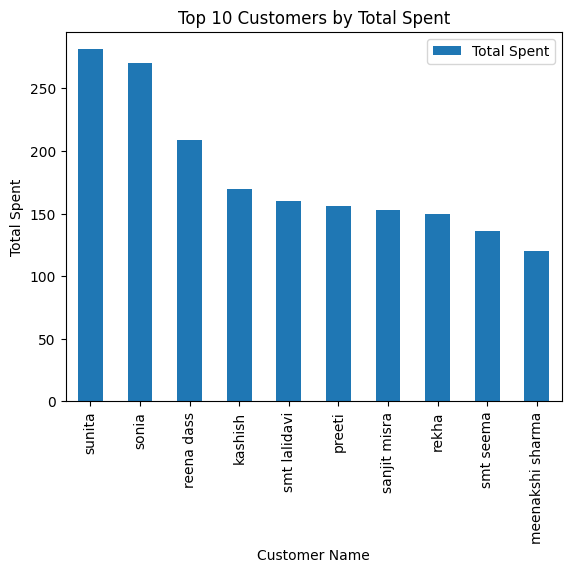

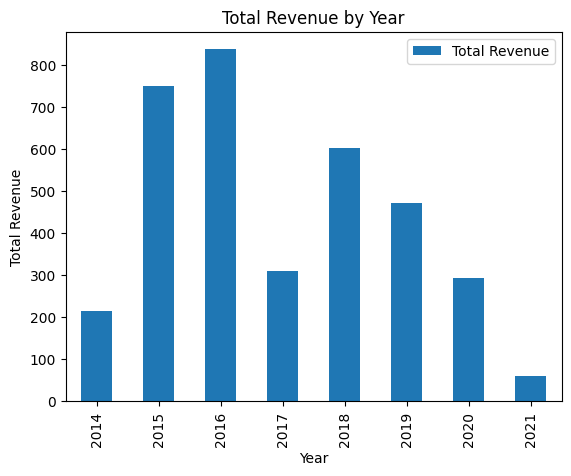

In [77]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

con = PostgresConnection().getConnection()
cur = con.cursor()

cur.execute("""SELECT c.name, SUM(f.total_price) AS total_spent
               FROM ecom_schema.fact_table f
               INNER JOIN ecom_schema.coustomer_dim c
               ON f.coustomer_key = c.coustomer_key
               GROUP BY c.name
               ORDER BY total_spent DESC""")
result = cur.fetchall()
cur.close()

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=['Customer Name', 'Total Spent'])

# Plot the top 10 customers by total spent
df.head(10).plot(kind='bar', x='Customer Name', y='Total Spent')
plt.title('Top 10 Customers by Total Spent')
plt.xlabel('Customer Name')
plt.ylabel('Total Spent')
plt.show()

# Calculate the total revenue by year and plot the result
cur = con.cursor()
cur.execute("""SELECT time_dim.year, SUM(fact_table.total_price) AS total_revenue
               FROM ecom_schema.fact_table
               INNER JOIN ecom_schema.time_dim
               ON fact_table.time_key = time_dim.time_key
               GROUP BY time_dim.year""")
result = cur.fetchall()
cur.close()

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=['Year', 'Total Revenue'])

# Plot the total revenue by year
df.plot(kind='bar', x='Year', y='Total Revenue')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

# Close the database connection
con.close()


# Analytics 2- Total sales for each customer, broken down by month

In [78]:
import psycopg2
import pandas as pd

# establish a connection to the database
con = PostgresConnection().getConnection()
cur = con.cursor()
# SQL query to calculate the total sales per month for each customer
sql = """
    SELECT 
        c.coustomer_key, 
        to_char(t.date, 'YYYY-MM') AS month, 
        SUM(f.total_price) AS total_sales
    FROM 
        ecom_schema.coustomer_dim c 
        JOIN ecom_schema.fact_table f ON c.coustomer_key = f.coustomer_key
        JOIN ecom_schema.time_dim t ON f.time_key = t.time_key
    GROUP BY 
        c.coustomer_key, 
        to_char(t.date, 'YYYY-MM')
    ORDER BY 
        c.coustomer_key, 
        to_char(t.date, 'YYYY-MM')
"""

# execute the query and load the results into a Pandas dataframe
df = pd.read_sql_query(sql, con)

# close the database connection
con.close()

# display the results
print(df)


Connection to DB established!
   coustomer_key    month  total_sales
0        C000136  2020-07           45
1        C000616  2016-06          153
2        C000849  2019-04           48
3        C002110  2015-05           75
4        C002529  2017-04           20
5        C002764  2016-10           74
6        C002814  2014-08           30
7        C003128  2018-02          150
8        C003131  2018-03          170
9        C004163  2015-06          270
10       C004333  2015-07          156
11       C004337  2016-11          153
12       C004437  2021-01           60
13       C004506  2020-10           90
14       C004510  2016-04           35
15       C004635  2017-10           60
16       C004785  2019-01           60
17       C005138  2015-08           90
18       C005695  2019-12           31
19       C006430  2014-07           64
20       C006599  2016-11           74
21       C006607  2017-12          209
22       C006613  2015-09          160
23       C006654  2016-04         

C:\Users\ACER\AppData\Local\Temp\ipykernel_8980\3893865059.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, con)


# Analytics 3-  Total sales by month and year

Connection to DB established!


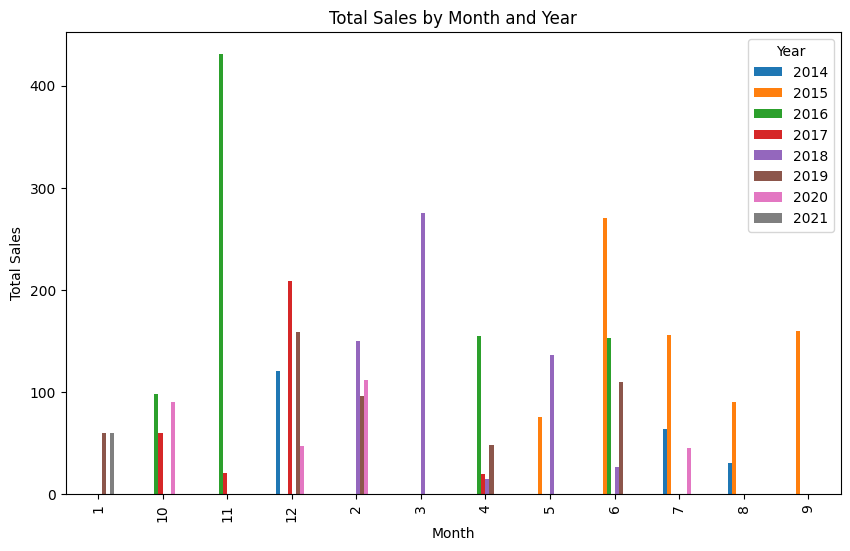

In [82]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# establish a connection to the database
con = PostgresConnection().getConnection()
# Calculate the average rating for each product category and plot the result
cur = con.cursor()
# Calculate the total sales by month and year
cur.execute("""SELECT time_dim.month, time_dim.year, SUM(fact_table.total_price) AS total_sales
               FROM ecom_schema.fact_table
               INNER JOIN ecom_schema.time_dim ON fact_table.time_key = time_dim.time_key
               GROUP BY time_dim.month, time_dim.year
               ORDER BY time_dim.year, time_dim.month""")
result = cur.fetchall()

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=['Month', 'Year', 'Total Sales'])

# Plot the total sales by month and year
fig, ax = plt.subplots(figsize=(10,6))
pivot_df = df.pivot(index='Month', columns='Year', values='Total Sales')
pivot_df.plot(kind='bar', ax=ax)
ax.set_title('Total Sales by Month and Year')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
plt.show()

# Close the database connection
cur.close()
con.close()